<a href="https://colab.research.google.com/github/RafsanJany-44/ACM/blob/master/SHAP_XG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Powered By](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

#What is SHAP? 
[Get](https://www.youtube.com/watch?v=NBg7YirBTN8)


In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.2 MB/s 


In [2]:
import pandas as pd
import shap
import sklearn
from sklearn.preprocessing import LabelEncoder
data = 'https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv'
dataset = pd.read_csv(data)
encoder=LabelEncoder()
dataset["Sleep Stage"]=encoder.fit_transform(dataset["Sleep Stage"])
shap.initjs()
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

dataset.head()

,Sleep Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,4,0.00051,8.74146,18.48195,17.48293,8.24195,0.00071,19.73073,29.84585,33.84195,...,0.00724,0.74927,3.87122,1.99805,0.87415,0.000210,35.21561,42.20878,49.95122,49.95122
1,4,0.00040,10.24000,17.48293,16.85854,10.61463,0.00051,17.23317,26.34927,29.34634,...,0.00723,0.49951,3.74634,1.24878,0.49951,0.000095,34.34146,43.33268,49.95122,49.95122
2,4,0.00036,9.74049,17.98244,17.48293,8.74146,0.00047,17.60780,25.47512,28.22244,...,0.00230,0.62439,5.24488,2.12293,0.62439,0.000074,34.59122,45.95512,49.95122,49.95122
3,4,0.00035,10.11512,17.60780,17.10829,9.61561,0.00047,17.35805,26.47415,28.72195,...,0.00091,0.87415,6.61854,3.12195,0.62439,0.000082,32.46829,43.95707,49.95122,49.95122
4,4,0.00033,9.74049,17.60780,17.23317,8.11707,0.00043,17.23317,25.84976,28.09756,...,0.00175,0.49951,5.74439,2.24780,0.49951,0.000077,33.59220,44.83122,49.95122,49.95122


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [7]:
X_train2=X_train
X_test2=X_test

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)

X_test =sc.fit_transform(X_test)


#X_train = pd.DataFrame(X_train, index=X_train2.index, columns=X_train2.columns)
#X_test = pd.DataFrame(X_test, index=X_test2.index, columns=X_test2.columns)

In [4]:
X100 = shap.utils.sample(X_train, 5).values

In [5]:
type(X100)

numpy.ndarray

In [9]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(max_depth=2)
xgb_classifier.fit(X_train, y_train)  
y_pred_XG = xgb_classifier.predict(X_test)

In [11]:
explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer.shap_values(X_train)
i = 100


In [13]:
explainer = shap.TreeExplainer(xgb_classifier)

start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

array([[-0.07552888, -0.41966602, -0.27678882, -0.34038724, -0.38251809,
        -0.1258137 , -0.26510862, -0.27385845, -0.35697749, -0.52716968,
        -0.06759855, -0.08780701, -0.27332109, -0.1482072 , -0.14794356,
        -0.14614235, -0.15958621,  0.03552598, -0.13685899, -0.16044238,
        -0.07196888, -0.69299824, -0.84006045, -0.39419836,  0.46216804,
        -0.08810941, -0.2710971 , -0.44502152, -0.47656027, -0.33288068,
        -0.06636687, -0.37453451, -0.33520586, -0.43723453, -0.59605389,
        -0.07795828, -0.08216461, -0.29363911, -0.15044409,  0.1232497 ,
        -0.14662401, -0.05102621,  0.13261545,  0.02314082, -0.10162382,
        -0.04821868, -0.76199785, -0.98259125, -0.87835471,  0.47941509,
        -0.09029539, -0.10016008, -0.31181646, -0.35664453, -0.23826362,
        -0.14688737, -0.34254382, -0.37823533, -0.46614675, -0.52712441,
        -0.07878733, -0.09991035, -0.18612694, -0.13915565, -0.18574836,
        -0.15215087, -0.14780101, -0.00303159, -0.1

In [14]:
shap.initjs()
# Force plot
prediction = xgb_classifier.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values

The RF predicted: 3


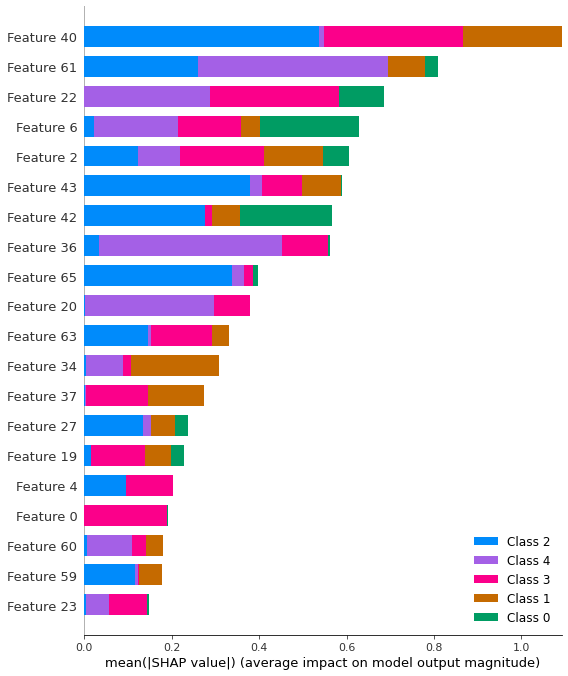

In [15]:
shap.summary_plot(shap_values, X_test)


In [ ]:
shap.force_plot(explainer.expected_value, shap_values[i], features=X_train.loc[71], feature_names=X_train.columns)

#Partial dependence plots

In [ ]:
explainer = shap.Explainer(xgb_classifier.predict, X100)
shap_values = explainer(X_test)

Permutation explainer: 32537it [23:58, 22.46it/s]                           


**Summary plot - most important features:**

The following figure shows the SHAP feature importanc. SHAP feature importance measured as the mean absolute Shapley values. The feature importance plot is useful, but contains no information beyond the importances.

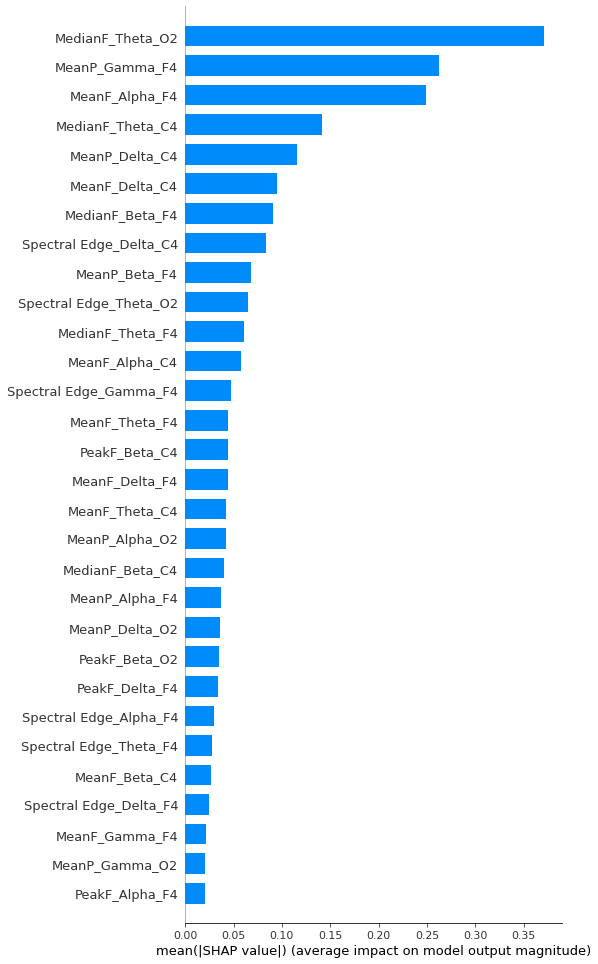

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar',max_display=30)
#MedianF_Theta_O2

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

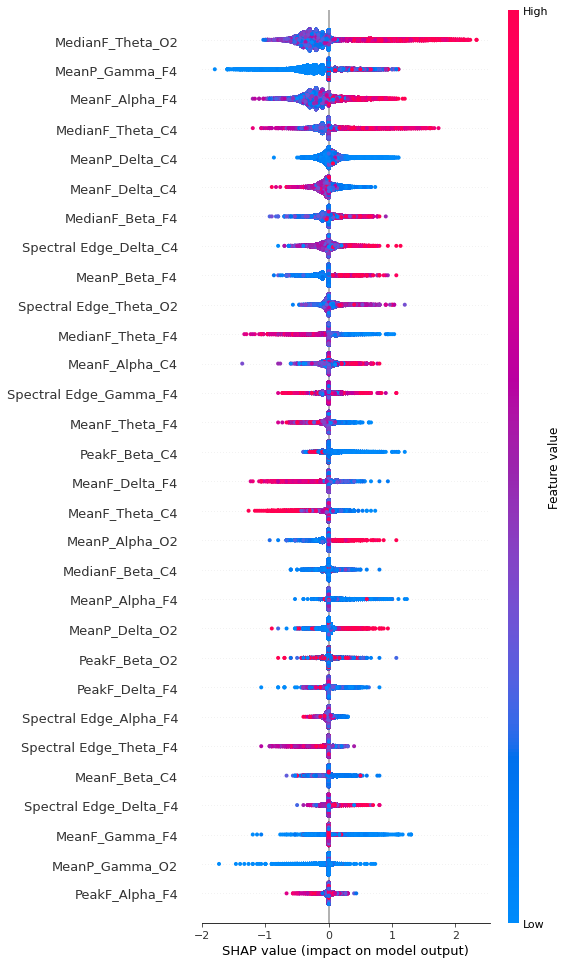

In [ ]:
shap.summary_plot(shap_values, X_test,max_display=30)

In [ ]:
import numpy as np
np.array(X_test.iloc[,61:63])

SyntaxError: ignored

In [ ]:
sample_ind = 20               
shap.partial_dependence_plot(
    X_test.iloc[0:0,61:62].values, xgb_classifier.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

IndexError: ignored

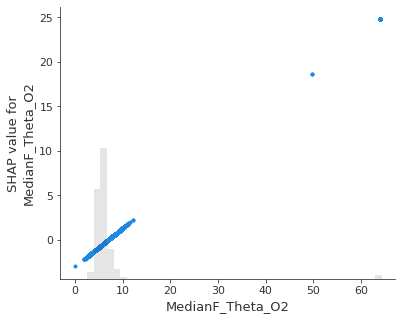

In [ ]:
shap.plots.scatter(shap_values[:,"MedianF_Theta_O2"])

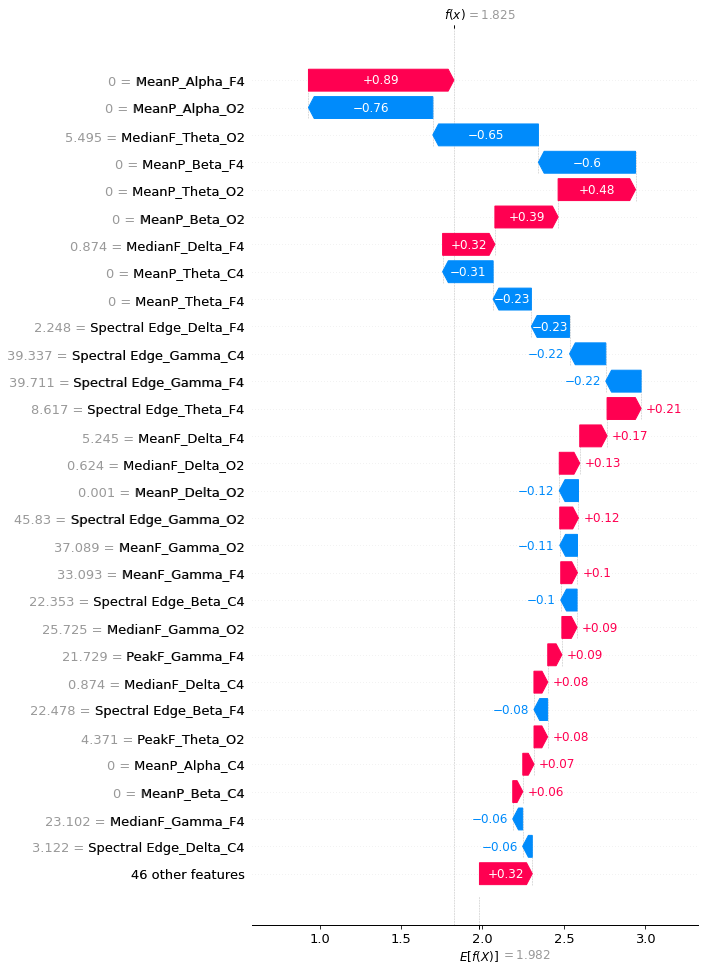

In [ ]:
shap.plots.waterfall(shap_values[sample_ind], max_display=30)

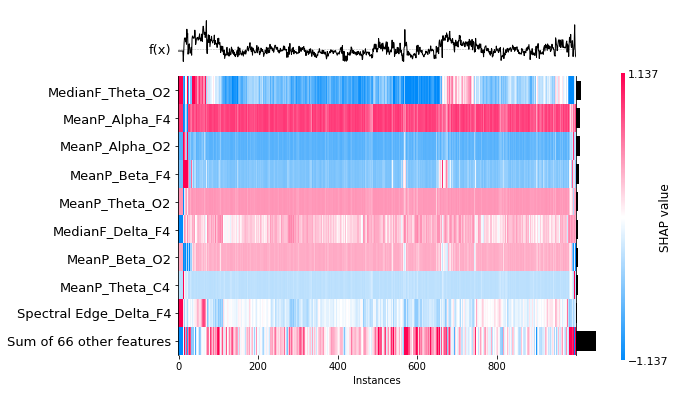

In [ ]:
shap.plots.heatmap(shap_values[:1000])

In [ ]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    MxCof, model_a_proba, X_test, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)


NameError: ignored

In [ ]:
# compute the SHAP values for the linear model
background_adult = shap.maskers.Independent(X_test, max_samples=100)
explainer = shap.Explainer(model_a_proba, background_adult)
shap_values_a = explainer(X_test[:1000])

In [ ]:
shap.plots.scatter(shap_values_a[:,MxCof])

In [ ]:
# compute the SHAP values for the linear model
explainer_log_odds = shap.Explainer(model_a_log_odds, background_adult)
shap_values_a_log_odds = explainer_log_odds(X_test[:1000])

In [ ]:
shap.plots.scatter(shap_values_a_log_odds[:,MxCof])

In [ ]:
# make a standard partial dependence plot
sample_ind = 18
fig,ax = shap.partial_dependence_plot(
    MxCof, model_a_log_odds, X_test, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

In [ ]:
# train XGBoost model
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X_train, y_train*1, eval_metric="logloss")

# compute SHAP values
explainer = shap.Explainer(model, background_adult)
shap_values = explainer(X_test)

# set a display version of the data to use for plotting (has string values)
shap_values.display_data = shap.datasets.adult(display=True)[0].values

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.bar(shap_values.abs.max(0))

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

In [ ]:
shap.plots.heatmap(shap_values[:1000])

In [ ]:
shap.plots.scatter(shap_values[:,"Age"])

In [ ]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values)

In [ ]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values[:,"Capital Gain"])

In [ ]:
shap.plots.scatter(shap_values[:,"Relationship"], color=shap_values)

In [ ]:
clustering = shap.utils.hclust(X_test, y_test)

In [ ]:
shap.plots.bar(shap_values, clustering=clustering)

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8)

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.8)